### dm-11-practice1

#### Import libraries  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### Parameters  

In [2]:
csv_in = 'invoices.csv'

#### Read CSV file  

In [3]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=0, header=0)
print(df.shape)
print(df.info())
display(df.head())

(252, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   InvoiceID  252 non-null    object
 1   ItemID     252 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.1+ KB
None


,InvoiceID,ItemID
0,S001,5
1,S001,3
2,S002,1
3,S002,3
4,S002,6


#### How many invoices and items?  

In [4]:
top_iv = df['InvoiceID'].value_counts()
top_sc = df['ItemID'].value_counts()
print('#Invoices:', top_iv.size)
print(top_iv.head())
print('#StockCode:', top_sc.size)
print(top_sc.head())

#Invoices: 100
S072    5
S088    5
S051    5
S086    5
S004    4
Name: InvoiceID, dtype: int64
#StockCode: 10
3    46
1    38
2    31
4    25
6    21
Name: ItemID, dtype: int64


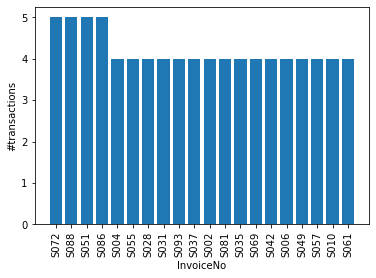

In [5]:
n_plt = 20
top_iv_idx = top_iv[:20].index.astype('str')
plt.bar(top_iv_idx, top_iv[:n_plt])
plt.xticks(rotation=90)
plt.xlabel('InvoiceNo')
plt.ylabel('#transactions')
plt.show()

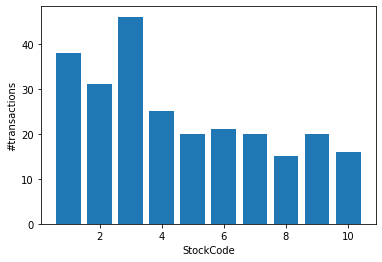

In [6]:
n_plt = 10
plt.bar(top_sc[:n_plt].index, top_sc[:n_plt])
plt.xlabel('StockCode')
plt.ylabel('#transactions')
plt.show()

#### Basket Analysis (jaccard, support, confidence, lift) of the top two items  

##### Get StockCode for the top two items  

In [7]:
top_sc1 = top_sc.index[0]
top_sc2 = top_sc.index[1]
print(top_sc1, top_sc2)

3 1


##### Collect invoices of these items  

In [8]:
df_sc1 = df[ df['ItemID']==top_sc1 ]
df_sc2 = df[ df['ItemID']==top_sc2 ]

In [9]:
iv_all = set(df['InvoiceID'])
iv_sc1 = set(df_sc1['InvoiceID'])
iv_sc2 = set(df_sc2['InvoiceID'])
iv_both = iv_sc1 & iv_sc2
iv_either = iv_sc1 | iv_sc2

In [10]:
n_all = len(iv_all)
n_sc1 = len(iv_sc1)
n_sc2 = len(iv_sc2)
n_both = len(iv_both)
n_either = len(iv_either)
print(n_all, n_sc1, n_sc2, n_both, n_either)

100 46 38 23 61


##### Jaccard Coeff.  

In [11]:
print('Jac(sc1 => sc2):',  n_both / n_either)

Jac(sc1 => sc2): 0.3770491803278688


##### Support (支持度)  

In [12]:
print('Supp(sc1 => sc2):', n_both / n_all)

Supp(sc1 => sc2): 0.23


##### Confidence (確信度, 信頼度)  

In [13]:
print('Conf(sc1 => sc2):', n_both / n_sc1)  # Confidence based on top_sc1
print('Conf(sc2 => sc1):', n_both / n_sc2)  # Confidence based on top_sc2

Conf(sc1 => sc2): 0.5
Conf(sc2 => sc1): 0.6052631578947368


##### Lift (リフト値)  

In [14]:
a = n_both / n_sc2
b = n_sc1 / n_all
print('Lift(sc1 => sc2):', a/b)

Lift(sc1 => sc2): 1.3157894736842104
